In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv(r"/content/drive/MyDrive/3_total_with_clusters.csv")
df = df.drop('Unnamed: 0', axis=1)
df_groups = df.groupby('house_cluster')

Cluster 0

In [4]:
cluster0 = df_groups.get_group(3)
energy0 = cluster0.drop('house_cluster', axis=1)

In [5]:
housecount0 = cluster0.groupby('day')[['LCLid']].nunique()
# housecount0.get_group('2012-11-07')
housecount0.head()

,LCLid
day,
2012-06-20,1
2012-06-21,1
2012-09-14,1
2012-09-15,1
2012-09-16,1


<Axes: xlabel='day'>

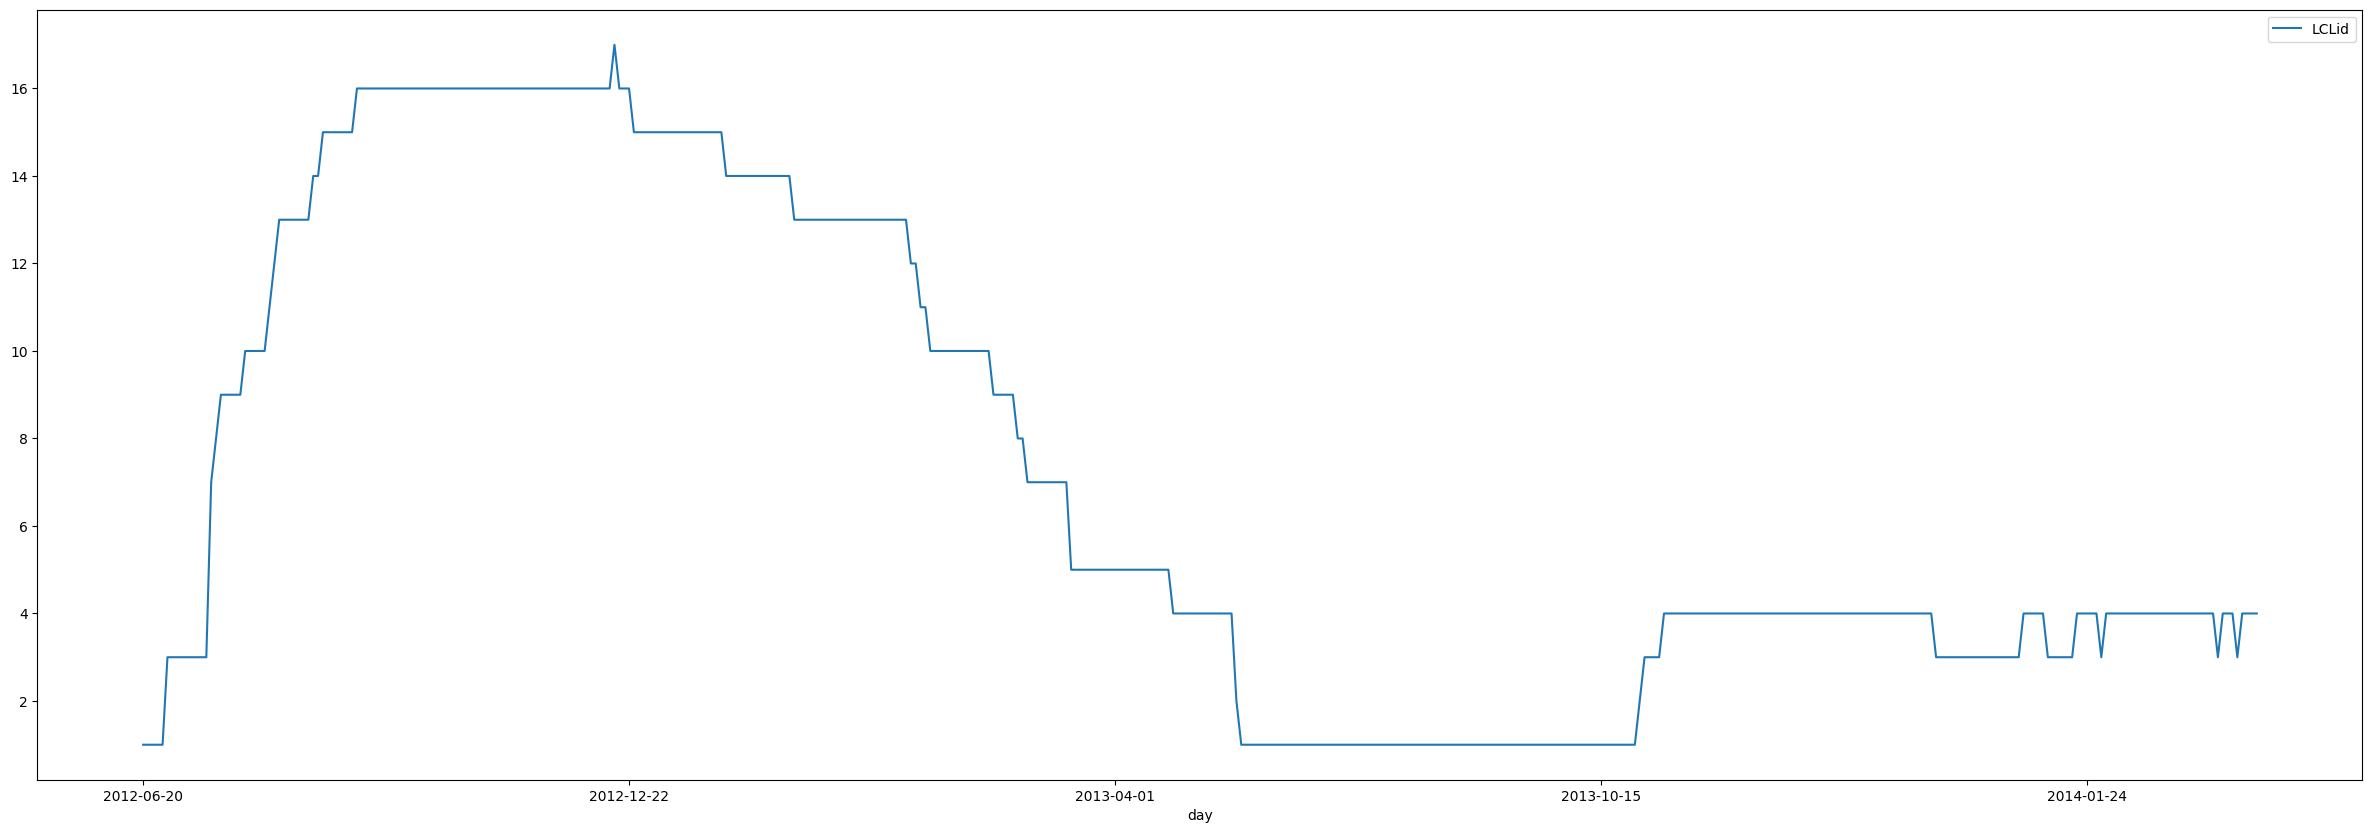

In [6]:
housecount0.plot(figsize=(30,10))

In [7]:
# [['LCLid', 'energy_sum', 'temperatureMax', 'windSpeed', 'humidity', 'holiday_ind']]
energy0 = cluster0.groupby('day')[['energy_sum', 'temperatureMax', 'windSpeed', 'humidity', 'holiday_ind']].sum()
energy0 = energy0.merge(housecount0, on=['day'])
energy0 = energy0.reset_index()
energy0.count()

day               436
energy_sum        436
temperatureMax    436
windSpeed         436
humidity          436
holiday_ind       436
LCLid             436
dtype: int64

In [8]:
energy0['day'] = pd.to_datetime(energy0['day'],format='%Y-%m-%d').dt.date

In [9]:
energy0['avg_energy'] =  energy0['energy_sum']/energy0['LCLid']
print("Starting Point of Data at Day Level",min(energy0['day']))
print("Ending Point of Data at Day Level",max(energy0['day']))

Starting Point of Data at Day Level 2012-06-20
Ending Point of Data at Day Level 2014-02-28


In [10]:
energy0

,day,energy_sum,temperatureMax,windSpeed,humidity,holiday_ind,LCLid,avg_energy
0,2012-06-20,3.896,19.08,2.75,0.84,0,1,3.89600
1,2012-06-21,1.894,17.53,7.04,0.78,0,1,1.89400
2,2012-09-14,7.778,21.12,2.87,0.70,0,1,7.77800
3,2012-09-15,8.156,18.31,3.88,0.76,1,1,8.15600
4,2012-09-16,9.913,18.72,4.04,0.71,1,1,9.91300
...,...,...,...,...,...,...,...,...
431,2014-02-24,31.815,42.69,15.06,2.22,0,3,10.60500
432,2014-02-25,49.665,45.72,22.76,3.12,0,4,12.41625
433,2014-02-26,39.610,45.16,15.28,2.92,0,4,9.90250
434,2014-02-27,44.615,41.24,16.56,2.96,0,4,11.15375


In [11]:
energy0.describe()

,energy_sum,temperatureMax,windSpeed,humidity,holiday_ind,LCLid,avg_energy
count,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000
mean,130.567420,67.506216,26.335161,5.935596,2.006881,7.144495,15.684654
std,112.724185,58.450281,24.119944,4.853320,4.356783,5.551410,7.006519
min,0.000000,-0.840000,0.510000,0.430000,0.000000,1.000000,0.000000
25%,37.987750,23.695000,6.807500,2.490000,0.000000,3.000000,11.239500
50%,63.204000,41.160000,18.070000,3.400000,0.000000,4.000000,15.781383
75%,257.243000,101.800000,39.360000,10.725000,1.000000,13.000000,18.924788
max,345.465000,242.700000,121.280000,15.640000,16.000000,17.000000,65.152800


In [12]:
# Weather clusters
from sklearn.preprocessing import MinMaxScaler

scaler0 = MinMaxScaler()
weather_scaled0 = scaler0.fit_transform(energy0[['temperatureMax','humidity','windSpeed']])

In [13]:
weather_scaled0

array([[0.08179355, 0.02695595, 0.01854765],
       [0.07542909, 0.02301118, 0.05406972],
       [0.09016999, 0.01775148, 0.01954128],
       ...,
       [0.18888068, 0.16370809, 0.12229858],
       [0.17278476, 0.16633794, 0.13289724],
       [0.12416851, 0.19789612, 0.06996771]])

[KMeans(n_clusters=1, n_init='auto'), KMeans(n_clusters=2, n_init='auto'), KMeans(n_clusters=3, n_init='auto'), KMeans(n_clusters=4, n_init='auto'), KMeans(n_clusters=5, n_init='auto'), KMeans(n_clusters=6, n_init='auto'), KMeans(n_clusters=7, n_init='auto'), KMeans(n_init='auto'), KMeans(n_clusters=9, n_init='auto'), KMeans(n_clusters=10, n_init='auto'), KMeans(n_clusters=11, n_init='auto'), KMeans(n_clusters=12, n_init='auto'), KMeans(n_clusters=13, n_init='auto'), KMeans(n_clusters=14, n_init='auto'), KMeans(n_clusters=15, n_init='auto'), KMeans(n_clusters=16, n_init='auto'), KMeans(n_clusters=17, n_init='auto'), KMeans(n_clusters=18, n_init='auto'), KMeans(n_clusters=19, n_init='auto')]
[-86.69785939641098, -24.750988188368776, -16.819588472509032, -14.16455259445521, -11.938346753583671, -9.485024852189584, -8.35294346832543, -7.186356524454405, -6.643216674293489, -6.040638164885014, -5.390582484976367, -5.509820817990146, -4.6866809410608115, -4.343635136067531, -4.3918720601391

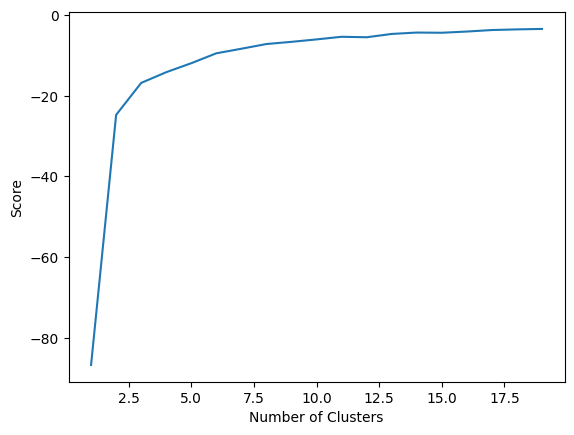

In [14]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


Nc0 = range(1,20)
kmeans0 = [KMeans(n_clusters=i, n_init='auto') for i in Nc0]
print(kmeans0)

score0 = [kmeans0[i].fit(weather_scaled0).score(weather_scaled0) for i in range(len(kmeans0))]
print(score0)

plt.plot(Nc0, score0)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.show()

In [15]:
kmeans0 = KMeans(n_clusters=3, max_iter=600, algorithm='lloyd', n_init='auto')
kmeans0.fit(weather_scaled0)
energy0['weather_cluster'] = kmeans0.labels_
energy0.head()

,day,energy_sum,temperatureMax,windSpeed,humidity,holiday_ind,LCLid,avg_energy,weather_cluster
0,2012-06-20,3.896,19.08,2.75,0.84,0,1,3.896,0
1,2012-06-21,1.894,17.53,7.04,0.78,0,1,1.894,0
2,2012-09-14,7.778,21.12,2.87,0.70,0,1,7.778,0
3,2012-09-15,8.156,18.31,3.88,0.76,1,1,8.156,0
4,2012-09-16,9.913,18.72,4.04,0.71,1,1,9.913,0


In [16]:
# Model

In [17]:
import numpy as np

np.random.seed(11)
dataframe = energy0.loc[:,'avg_energy']
dataset = dataframe.values
dataset = dataset.astype('float32')

In [18]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [19]:
reframed0 = series_to_supervised(dataset, 7,1)
reframed0.head()

,var1(t-7),var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1),var1(t)
7,3.896,1.894,7.778,8.156000,9.913000,9.468000,14.255000,15.265667
8,1.894,7.778,8.156,9.913000,9.468000,14.255000,15.265667,15.560667
9,7.778,8.156,9.913,9.468000,14.255000,15.265667,15.560667,16.215666
10,8.156,9.913,9.468,14.255000,15.265667,15.560667,16.215666,29.969999
11,9.913,9.468,14.255,15.265667,15.560667,16.215666,29.969999,35.252998


In [20]:
reframed0['weather_cluster'] = energy0['weather_cluster'].values[7:]
reframed0['holiday_ind']= energy0['holiday_ind'].values[7:]

In [21]:
reframed0 = reframed0.reindex(['weather_cluster', 'holiday_ind','var1(t-7)', 'var1(t-6)', 'var1(t-5)', 'var1(t-4)', 'var1(t-3)','var1(t-2)', 'var1(t-1)', 'var1(t)'], axis=1)
reframed0 = reframed0.values

In [22]:
n = int(0.2*(len(energy0)))
n

87

In [23]:
# Normalisation
scaler0 = MinMaxScaler(feature_range=(0, 1))
reframed0 = scaler0.fit_transform(reframed0)

In [24]:
train0 = reframed0[:(len(reframed0)-n), :]
test0 = reframed0[(len(reframed0)-n):len(reframed0), :]

In [25]:
train_X0, train_y0 = train0[:, :-1], train0[:, -1]
test_X0, test_y0 = test0[:, :-1], test0[:, -1]

In [26]:
train_X0 = train_X0.reshape((train_X0.shape[0], 1, train_X0.shape[1]))
test_X0 = test_X0.reshape((test_X0.shape[0], 1, test_X0.shape[1]))
print(train_X0.shape, train_y0.shape, test_X0.shape, test_y0.shape)

(342, 1, 9) (342,) (87, 1, 9) (87,)


In [27]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.regularizers import L2

In [28]:
# # design network
# model = Sequential()
# model.add(LSTM(50, input_shape=(train_X0.shape[1], train_X0.shape[2]), return_sequences=True))
# model.add(LSTM(50, return_sequences=True))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(1))
# model.compile(loss='mae', optimizer='rmsprop')

# # fit network
# history = model.fit(train_X0, train_y0, epochs=50, batch_size=72, verbose=2, shuffle=False, validation_data=(test_X0, test_y0))

# # plot history
# plt.plot(history.history['loss'], label='train')
# plt.plot(history.history['val_loss'], label='test')
# plt.legend()
# plt.show()


In [29]:
# # design network
# model = Sequential()
# model.add(LSTM(50, input_shape=(train_X0.shape[1], train_X0.shape[2]), return_sequences=True))
# model.add(Dropout(0.2))
# model.add(LSTM(50, return_sequences=True))
# model.add(Dropout(0.2))
# model.add(Dense(32, activation='relu', kernel_regularizer=L2(0.01)))
# model.add(Dense(1))
# model.compile(loss='mse', optimizer='adam')

# # fit network
# history = model.fit(train_X0, train_y0, epochs=100, batch_size=32, verbose=2, shuffle=False, validation_data=(test_X0, test_y0))

# # plot history
# plt.plot(history.history['loss'], label='train')
# plt.plot(history.history['val_loss'], label='test')
# plt.legend()
# plt.show()

Epoch 1/100
11/11 - 4s - loss: 0.0644 - val_loss: 0.0254 - 4s/epoch - 365ms/step
Epoch 2/100
11/11 - 0s - loss: 0.0383 - val_loss: 0.0107 - 70ms/epoch - 6ms/step
Epoch 3/100
11/11 - 0s - loss: 0.0172 - val_loss: 0.0021 - 51ms/epoch - 5ms/step
Epoch 4/100
11/11 - 0s - loss: 0.0073 - val_loss: 0.0022 - 51ms/epoch - 5ms/step
Epoch 5/100
11/11 - 0s - loss: 0.0074 - val_loss: 0.0020 - 51ms/epoch - 5ms/step
Epoch 6/100
11/11 - 0s - loss: 0.0072 - val_loss: 0.0015 - 65ms/epoch - 6ms/step
Epoch 7/100
11/11 - 0s - loss: 0.0064 - val_loss: 0.0015 - 68ms/epoch - 6ms/step
Epoch 8/100
11/11 - 0s - loss: 0.0058 - val_loss: 0.0016 - 51ms/epoch - 5ms/step
Epoch 9/100
11/11 - 0s - loss: 0.0056 - val_loss: 0.0017 - 69ms/epoch - 6ms/step
Epoch 10/100
11/11 - 0s - loss: 0.0055 - val_loss: 0.0016 - 53ms/epoch - 5ms/step
Epoch 11/100
11/11 - 0s - loss: 0.0053 - val_loss: 0.0016 - 50ms/epoch - 5ms/step
Epoch 12/100
11/11 - 0s - loss: 0.0050 - val_loss: 0.0016 - 52ms/epoch - 5ms/step
Epoch 13/100
11/11 - 0s -

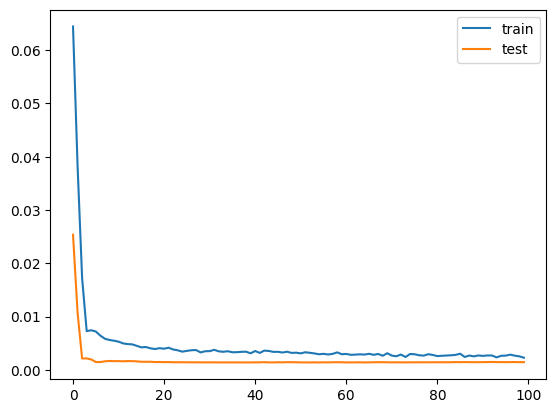

In [30]:
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X0.shape[1], train_X0.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

# fit network
history = model.fit(train_X0, train_y0, epochs=100, batch_size=32, verbose=2, shuffle=False, validation_data=(test_X0, test_y0))

# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

3/3 [==============================] - 1s 3ms/step
(87, 1) (87,)
(87,) (87,)
Test MAE: 0.029


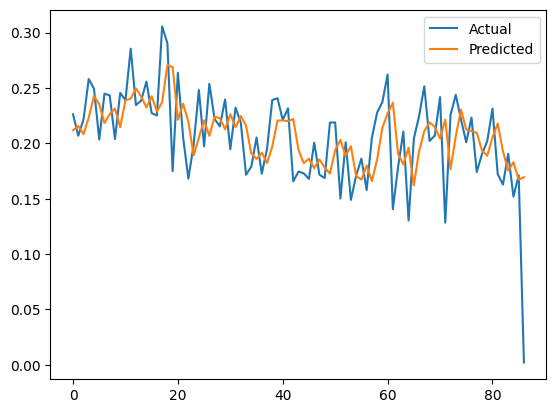

In [31]:
# make predictions on test data
from sklearn.metrics import mean_absolute_error


y_pred = model.predict(test_X0)
print(y_pred.shape, test_y0.shape)
y_pred = y_pred.reshape(-1)
test_y0 = test_y0.reshape(-1)
print(y_pred.shape, test_y0.shape)
# calculate MAE
mae = mean_absolute_error(test_y0, y_pred)
print('Test MAE: %.3f' % mae)

# plot actual vs predicted values
plt.plot(test_y0)
plt.plot(y_pred)
plt.legend(['Actual', 'Predicted'])
plt.show()

In [32]:
from sklearn.metrics import mean_squared_error

# calculate MSE
mse = mean_squared_error(test_y0, y_pred)
print('Test MSE: %.3f' % mse)

rmse = np.sqrt(mse)
print('Test RMSE: %.3f' % rmse)

Test MSE: 0.001
Test RMSE: 0.038


In [33]:
from sklearn.metrics import r2_score
acc = r2_score(test_y0, y_pred)
print(acc)

0.18252179998795093


Cross Validation

In [34]:
df_temp0 = pd.DataFrame(reframed0, columns = ['weather_cluster', 'holiday_ind','var1(t-7)', 'var1(t-6)', 'var1(t-5)', 'var1(t-4)', 'var1(t-3)','var1(t-2)', 'var1(t-1)', 'var1(t)'])
df_temp0['date'] = energy0['day']
df_temp0 = df_temp0[['date', 'weather_cluster', 'holiday_ind','var1(t-7)', 'var1(t-6)', 'var1(t-5)', 'var1(t-4)', 'var1(t-3)','var1(t-2)', 'var1(t-1)', 'var1(t)']]
df_temp0

,date,weather_cluster,holiday_ind,var1(t-7),var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1),var1(t)
0,2012-06-20,0.0,0.0000,0.059798,0.029070,0.119381,0.125183,0.152150,0.145320,0.218793,0.234306
1,2012-06-21,0.0,0.0000,0.029070,0.119381,0.125183,0.152150,0.145320,0.218793,0.234306,0.238833
2,2012-09-14,0.0,0.0000,0.119381,0.125183,0.152150,0.145320,0.218793,0.234306,0.238833,0.248887
3,2012-09-15,0.0,0.1875,0.125183,0.152150,0.145320,0.218793,0.234306,0.238833,0.248887,0.459996
4,2012-09-16,0.0,0.1875,0.152150,0.145320,0.218793,0.234306,0.238833,0.248887,0.459996,0.541082
...,...,...,...,...,...,...,...,...,...,...,...
424,2014-02-17,0.0,0.0000,0.200908,0.223256,0.174152,0.190214,0.201914,0.231348,0.172218,0.162771
425,2014-02-18,0.0,0.0000,0.223256,0.174152,0.190214,0.201914,0.231348,0.172218,0.162771,0.190571
426,2014-02-19,0.0,0.0000,0.174152,0.190214,0.201914,0.231348,0.172218,0.162771,0.190571,0.151989
427,2014-02-20,0.0,0.0000,0.190214,0.201914,0.231348,0.172218,0.162771,0.190571,0.151989,0.171194


In [35]:
X = df_temp0.iloc[:,:-1]
y = df_temp0.iloc[:,-1]

In [36]:
from sklearn.model_selection import GroupKFold

# Assuming you have time series data X and target variable y, as well as a groups variable defining the groups
# For example, groups could be the year or month of each data point

# Define the number of folds and the groups for each data point
n_splits = 5
scores = []
groups = X['date']

# Define the grouped k-fold cross-validation object
group_kfold = GroupKFold(n_splits=n_splits)

In [37]:
X = X.drop(['date'], axis=1)
X

,weather_cluster,holiday_ind,var1(t-7),var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1)
0,0.0,0.0000,0.059798,0.029070,0.119381,0.125183,0.152150,0.145320,0.218793
1,0.0,0.0000,0.029070,0.119381,0.125183,0.152150,0.145320,0.218793,0.234306
2,0.0,0.0000,0.119381,0.125183,0.152150,0.145320,0.218793,0.234306,0.238833
3,0.0,0.1875,0.125183,0.152150,0.145320,0.218793,0.234306,0.238833,0.248887
4,0.0,0.1875,0.152150,0.145320,0.218793,0.234306,0.238833,0.248887,0.459996
...,...,...,...,...,...,...,...,...,...
424,0.0,0.0000,0.200908,0.223256,0.174152,0.190214,0.201914,0.231348,0.172218
425,0.0,0.0000,0.223256,0.174152,0.190214,0.201914,0.231348,0.172218,0.162771
426,0.0,0.0000,0.174152,0.190214,0.201914,0.231348,0.172218,0.162771,0.190571
427,0.0,0.0000,0.190214,0.201914,0.231348,0.172218,0.162771,0.190571,0.151989


In [38]:
# Loop through each fold and split the data into training and testing sets
for train_index, test_index in group_kfold.split(X, y, groups):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Converting to nparray
    X_train = np.asarray(X_train).astype(np.float32)
    X_test = np.asarray(X_test).astype(np.float32)
    y_train = np.asarray(y_train).astype(np.float32)
    y_test = np.asarray(y_test).astype(np.float32)

    X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
    
    # Train and evaluate the model on the training and testing sets
    model.fit(X_train, y_train)
    score = model.evaluate(X_test, y_test)
    
    # Store the performance score for this fold
    scores.append(score)

# Compute the average performance score over all the folds
avg_score = sum(scores) / n_splits

3/3 [==============================] - 0s 3ms/step - loss: 0.0041


In [39]:
model.metrics_names

['loss']

In [40]:
scores

[0.002725120633840561,
 0.0019331295043230057,
 0.0013639666140079498,
 0.0012645210372284055,
 0.004103608895093203]

In [41]:
avg_score

0.002278069336898625

In [42]:
# Interpretation:
# We took 'loss' as the evaluation metric while training our model, so this cross validation score basically means the how well the model is performing on data that it hasn't seen during training. 
# Here, the less validation score indicates better performance of the model. 
# Higher validation score would mean overfitting on the training data.

Grid Search

In [43]:
def create_model(units=50, optimizer='adam'):
    model = Sequential()
    model.add(LSTM(units, input_shape=(train_X0.shape[1], train_X0.shape[2]), return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units))
    model.add(Dense(1))
    model.compile(loss='mse', optimizer='adam')
    return model

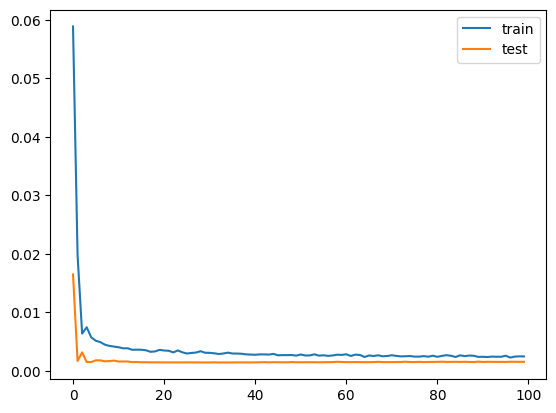

In [44]:
# MODEL update after Grid Search (units = 128,64 and verbose = 0)

# design network
model = Sequential()
model.add(LSTM(128, input_shape=(train_X0.shape[1], train_X0.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

# fit network
history = model.fit(train_X0, train_y0, epochs=100, batch_size=32, verbose=0, shuffle=False, validation_data=(test_X0, test_y0))

# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

3/3 [==============================] - 1s 3ms/step
(87, 1) (87,)
(87,) (87,)
Test MAE: 0.029


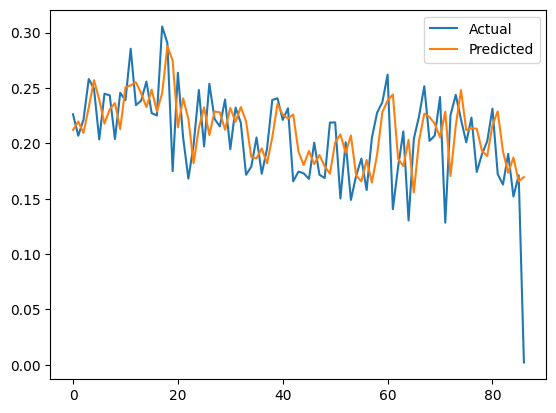

In [45]:
# make predictions on test data
from sklearn.metrics import mean_absolute_error


y_pred = model.predict(test_X0)
print(y_pred.shape, test_y0.shape)
y_pred = y_pred.reshape(-1)
test_y0 = test_y0.reshape(-1)
print(y_pred.shape, test_y0.shape)
# calculate MAE
mae = mean_absolute_error(test_y0, y_pred)
print('Test MAE: %.3f' % mae)

# plot actual vs predicted values
plt.plot(test_y0)
plt.plot(y_pred)
plt.legend(['Actual', 'Predicted'])
plt.show()

In [46]:
from sklearn.metrics import mean_squared_error

# calculate MSE
mse = mean_squared_error(test_y0, y_pred)
print('Test MSE: %.3f' % mse)

rmse = np.sqrt(mse)
print('Test RMSE: %.3f' % rmse)

Test MSE: 0.002
Test RMSE: 0.039


In [47]:
from sklearn.metrics import r2_score
acc = r2_score(test_y0, y_pred)
print(acc)

0.14020196315481426
